## Fine tune multilingual BERT

In this notebook, we will build a sentiment classification by fine tuning pre-trained multilingual BERT from HuggingFace

**Load the packages**

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import ktrain
import tensorflow as tf
from ktrain import text
from sklearn.model_selection import train_test_split

In [ ]:

!wget "https://raw.githubusercontent.com/snikhil17/nodes2021_kg_workshop/main/recleaned-reannotated%20(1).csv"

--2023-05-02 00:57:12--  https://raw.githubusercontent.com/snikhil17/nodes2021_kg_workshop/main/recleaned-reannotated%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10299714 (9.8M) [text/plain]
Saving to: ‘recleaned-reannotated (1).csv’

recleaned-reannotat 100%[===================>]   9.82M  --.-KB/s    in 0.1s    

2023-05-02 00:57:12 (96.6 MB/s) - ‘recleaned-reannotated (1).csv’ saved [10299714/10299714]



**Load the data**

In [ ]:
# Load dataset
df = pd.read_csv('/content/recleaned-reannotated (1).csv', encoding='utf=8')
df

,date,platform,text,cleaned_text,tokens,x_stopwords,x_cleaned,sentiment
0,00:00.0,Facebook,"With immense pride, CHED Regional Office VI pr...",with immense pride ched regional office vi pre...,"['with', 'immense', 'pride', 'ched', 'regional...","['immense', 'pride', 'regional', 'office', 'vi...",immense pride regional office vi presents entr...,2
1,00:00.0,Facebook,Have recieved my allowance for SY 2021-2022 se...,have recieved my allowance for sy second semes...,"['have', 'recieved', 'my', 'allowance', 'for',...","['recieved', 'allowance', 'sy', 'second', 'sem...",recieved allowance sy second semester thank mu...,2
2,00:00.0,Facebook,Wala parin mga pare at mareÃ°Å¸Ëœâ€šÃ°Å¸Ëœâ€š\...,wala parin mga pare at mare malapit na talaga ...,"['wala', 'parin', 'mga', 'pare', 'at', 'mare',...","['wala', 'parin', 'pare', 'mare', 'malapit', '...",wala parin pare mare malapit iilan nalang nati...,1
3,00:00.0,Facebook,"""I am the eldest daughter in a family of seven...",i am the eldest daughter in a family of seven ...,"['i', 'am', 'the', 'eldest', 'daughter', 'in',...","['eldest', 'daughter', 'family', 'seven', 'fat...",eldest daughter family seven father one workin...,2
4,00:00.0,Facebook,Thank you UniFast for this wonderful opportuni...,thank you unifast for this wonderful opportuni...,"['thank', 'you', 'unifast', 'for', 'this', 'wo...","['thank', 'wonderful', 'opportunity', 'given',...",thank wonderful opportunity given us help us m...,2
...,...,...,...,...,...,...,...,...
6295,16/01/2023 0:00,Facebook,TES Update #293\n\nMay naka-abang na biyaya sa...,tes update may naka abang na biyaya sa mimarop...,"['tes', 'update', 'may', 'naka', 'abang', 'na'...","['update', 'naka', 'abang', 'biyaya', 'mimarop...",update naka abang biyaya mimaropa marked safe ...,0
6296,30/06/2021 0:00,Facebook,"Magandang araw po Ma'am/Sir,itatanong ko lang ...",magandang araw po ma am sir itatanong ko lang ...,"['magandang', 'araw', 'po', 'ma', 'am', 'sir',...","['magandang', 'araw', 'itatanong', 'sana', 'up...",magandang araw itatanong sana update kagaya pw...,2
6297,28/07/2021 0:00,Facebook,May matatanggap po bang TES ang mga new grante...,may matatanggap po bang tes ang mga new grante...,"['may', 'matatanggap', 'po', 'bang', 'tes', 'a...","['matatanggap', 'bang', 'new', 'grantees', 'co...",matatanggap bang new grantees continuing grant...,2
6298,09/10/2022 0:00,Facebook,"""Nagpakasal ako noong ako'y 18 taong gulang at...",nagpakasal ako noong ako y taong gulang at han...,"['nagpakasal', 'ako', 'noong', 'ako', 'y', 'ta...","['nagpakasal', 'noong', 'taong', 'gulang', 'rd...",nagpakasal noong taong gulang rd year high sch...,0


In [ ]:
df.shape

(6300, 8)

In [ ]:
df = df[['cleaned_text', 'sentiment']].reset_index(drop = True)
df.dropna(subset='cleaned_text',inplace=True)
print(df.shape)
df.head()

(6300, 2)


,cleaned_text,sentiment
0,with immense pride ched regional office vi pre...,2
1,have recieved my allowance for sy second semes...,2
2,wala parin mga pare at mare malapit na talaga ...,1
3,i am the eldest daughter in a family of seven ...,2
4,thank you unifast for this wonderful opportuni...,2


In [ ]:
df.isnull().sum().sort_values(ascending = False)

cleaned_text    0
sentiment       0
dtype: int64

In [ ]:
round(df['sentiment'].value_counts(normalize = True) * 100)

2    59.0
0    22.0
1    19.0
Name: sentiment, dtype: float64

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(str)
# df['sentiment'] = df['sentiment'].astype(str)

In [ ]:

df.dtypes

cleaned_text    object
sentiment        int64
dtype: object

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified train/test splitting
df.reset_index(drop=True, inplace=True)
ss1 = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
for train_index, intermediate_index in ss1.split(df, df['sentiment']):
    print(intermediate_index)
    train_set = df.loc[train_index]
    test_set = df.loc[intermediate_index]


# Indexes are unordered, put them back
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

[1255 5660 6020 ... 1373 3714 4580]
[ 310  891 2141 ... 5393 4036 3494]
[2877 2367  663 ...  840 4115 1988]
[1975 4361 4635 ... 5889 1935 5727]


In [ ]:
test_set.sentiment.value_counts(dropna = False)

2    1123
0     408
1     359
Name: sentiment, dtype: int64

In [ ]:

# Inputs
X_train = np.asarray(train_set.text)
X_test = np.asarray(test_set.text)

# Outputs
y_train = train_set.sentiment.values
y_test = test_set.sentiment.values

AttributeError: ignored

In [ ]:
(X_train,  y_train), (X_test, y_test), preproc = text.texts_from_array(x_train=X_train, 
                                                                       y_train=y_train,
                                                                       x_test=X_test, 
                                                                       y_test=y_test,
                                                                       class_names=['0', '1', '2'],
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1, 
                                                                       maxlen=320)

In [ ]:
model = text.text_classifier('bert', 
                             train_data=(X_train, y_train), 
                             preproc=preproc)

Is Multi-Label? False
maxlen is 320


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, 
                             train_data=(X_train, y_train), 
                             batch_size=8)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 320)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 320)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 320, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 320, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
hist = learner.fit_onecycle(1e-5, 10) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
552/552 [==============================] - 376s 632ms/step - loss: 0.8424 - accuracy: 0.6168
Epoch 2/5
552/552 [==============================] - 349s 632ms/step - loss: 0.7500 - accuracy: 0.6701
Epoch 3/5
552/552 [==============================] - 349s 632ms/step - loss: 0.6925 - accuracy: 0.7122
Epoch 4/5
552/552 [==============================] - 349s 632ms/step - loss: 0.5707 - accuracy: 0.7757
Epoch 5/5
552/552 [==============================] - 349s 632ms/step - loss: 0.4335 - accuracy: 0.8422


In [ ]:
learner.validate(val_data=(X_test, y_test))

60/60 [==============================] - 53s 809ms/step
              precision    recall  f1-score   support

           0       0.47      0.24      0.31       408
           1       0.62      0.53      0.57       359
           2       0.73      0.89      0.80      1123

    accuracy                           0.68      1890
   macro avg       0.61      0.55      0.56      1890
weighted avg       0.65      0.68      0.65      1890



array([[  97,   61,  250],
       [  43,  190,  126],
       [  68,   54, 1001]])



*   List item
*   List item

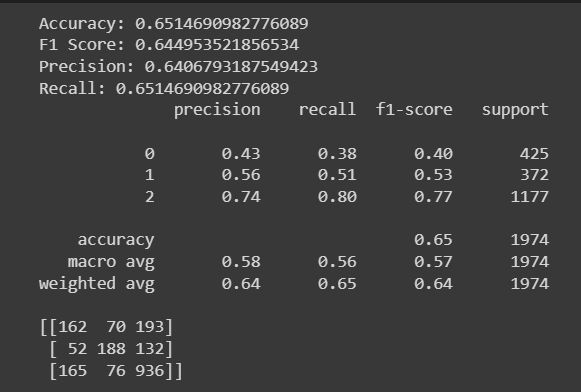

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
!pip install optuna

In [ ]:
# Inputs
X_train = np.asarray(train_set.cleaned_text)
X_test = np.asarray(test_set.cleaned_text)

# Outputs
y_train = train_set.sentiment.values.tolist()
y_test = test_set.sentiment.values.tolist()

In [ ]:
# del model

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00


In [ ]:
import gc

In [ ]:
import optuna
import ktrain
from ktrain import text

def objective(trial):
    # define the search space
    batch_size = trial.suggest_categorical('batch_size', [8, 12, 16, 24])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 2)
    num_epochs = trial.suggest_int('num_epochs', 5, 20)
    max_length = trial.suggest_int('max_length', 50, 500)
    
    # Initialize the BERT multilingual model
    model_name = 'bert-base-multilingual-cased'
    t = text.Transformer(model_name, maxlen=max_length, class_names=list(set(y_train)), batch_size=batch_size)

    # Preprocess the data
    trn = t.preprocess_train(X_train, y_train)
    val = t.preprocess_test(X_test, y_test)

    # Define the model
    model = t.get_classifier()

    # find optimal learning rate
    learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=batch_size)
    learner.lr_find(max_epochs=10)

    # fit the model with optimal learning rate
    learner.fit_onecycle(learning_rate, num_epochs)

    print("Result")
    print(learner.validate())


    result = learner.validate()[0]
    del model
    del t
    del trn
    del val
    del learner

    gc.collect()
    
    
    # evaluate the model
    return result

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

[I 2023-05-02 01:02:34,162] A new study created in memory with name: no-name-aaf63205-0c94-423a-b147-98a264b27e0a


preprocessing train...
language: en
train sequence lengths:
	mean : 50
	95percentile : 152
	99percentile : 379


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 51
	95percentile : 161
	99percentile : 390


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
275/275 [==============================] - 88s 231ms/step - loss: 1.0282 - accuracy: 0.4936
Epoch 2/10
275/275 [==============================] - 66s 241ms/step - loss: 0.8660 - accuracy: 0.6038
Epoch 3/10
275/275 [==============================] - 66s 238ms/step - loss: 0.7897 - accuracy: 0.6429
Epoch 4/10
275/275 [==============================] - 65s 237ms/step - loss: 0.7980 - accuracy: 0.6452
Epoch 5/10
275/275 [==============================] - 65s 237ms/step - loss: 0.9458 - accuracy: 0.5867
Epoch 6/10
275/275 [==============================] - 65s 237ms/step - loss: 0.9534 - accuracy: 0.5517
Epoch 7/10
275/275 [==============================] - 65s 235ms/step - loss: 4.6905 - accuracy: 0.4979


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


begin training using onecycle policy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


60/60 [==============================] - 7s 122ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       408
           1       0.00      0.00      0.00       359
           2       0.59      1.00      0.75      1123

    accuracy                           0.59      1890
   macro avg       0.20      0.33      0.25      1890
weighted avg       0.35      0.59      0.44      1890



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[W 2023-05-02 01:29:15,443] Trial 0 failed with parameters: {'ba

preprocessing train...
language: en
train sequence lengths:
	mean : 50
	95percentile : 152
	99percentile : 379


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 51
	95percentile : 161
	99percentile : 390


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
551/551 [==============================] - 251s 423ms/step - loss: 0.9563 - accuracy: 0.5892
Epoch 2/10
551/551 [==============================] - 233s 423ms/step - loss: 0.8368 - accuracy: 0.6124
Epoch 3/10
551/551 [==============================] - 233s 423ms/step - loss: 0.7740 - accuracy: 0.6504
Epoch 4/10
551/551 [==============================] - 232s 421ms/step - loss: 0.8129 - accuracy: 0.6493
Epoch 5/10
551/551 [==============================] - 232s 421ms/step - loss: 0.9812 - accuracy: 0.5831
Epoch 6/10
551/551 [==============================] - 232s 421ms/step - loss: 1.1409 - accuracy: 0.5241
Epoch 7/10
551/551 [==============================] - 231s 419ms/step - loss: 3.2819 - accuracy: 0.4589


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


begin training using onecycle

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


60/60 [==============================] - 28s 465ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       408
           1       0.00      0.00      0.00       359
           2       0.59      1.00      0.75      1123

    accuracy                           0.59      1890
   macro avg       0.20      0.33      0.25      1890
weighted avg       0.35      0.59      0.44      1890



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[W 2023-05-02 02:32:40,796] Trial 1 failed with parameters: {'ba

preprocessing train...
language: en
train sequence lengths:
	mean : 50
	95percentile : 152
	99percentile : 379


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 51
	95percentile : 161
	99percentile : 390


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
275/275 [==============================] - 253s 855ms/step - loss: 0.9960 - accuracy: 0.5020
Epoch 2/10
275/275 [==============================] - 235s 854ms/step - loss: 0.8105 - accuracy: 0.6284
Epoch 3/10
 31/275 [==>...........................] - ETA: 3:26 - loss: 0.7337 - accuracy: 0.7020

In [ ]:

# Initialize the BERT multilingual model
model_name = 'bert-base-multilingual-cased'
t = text.Transformer(model_name, maxlen=350, class_names=list(set(y_train)), batch_size=12)

# Preprocess the data
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

# Define the model
model = t.get_classifier()

# find optimal learning rate
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=24)
learner.lr_find(max_epochs=10)

# fit the model with optimal learning rate
learner.fit_onecycle(1e-3, 10)

preprocessing train...
language: en
train sequence lengths:
	mean : 50
	95percentile : 152
	99percentile : 379


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 51
	95percentile : 161
	99percentile : 390


simulating training for different learning rates... this may take a few moments...
Epoch 1/10
183/183 [==============================] - 117s 518ms/step - loss: 1.0356 - accuracy: 0.5321
Epoch 2/10
183/183 [==============================] - 95s 520ms/step - loss: 0.9120 - accuracy: 0.6001
Epoch 3/10
183/183 [==============================] - 94s 516ms/step - loss: 0.7975 - accuracy: 0.6386
Epoch 4/10
183/183 [==============================] - 94s 516ms/step - loss: 0.7929 - accuracy: 0.6475
Epoch 5/10
183/183 [==============================] - 94s 516ms/step - loss: 0.9658 - accuracy: 0.5880
Epoch 6/10
183/183 [==============================] - 94s 514ms/step - loss: 1.0679 - accuracy: 0.5565
Epoch 7/10
183/183 [==============================] - 67s 364ms/step - loss: 4.0070 - accuracy: 0.4258


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


begin training using onecycle polic

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
y_pred = predictor.predict(X_test) 


# print classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42       408
           1       0.54      0.45      0.49       359
           2       0.75      0.80      0.78      1123

    accuracy                           0.65      1890
   macro avg       0.58      0.56      0.56      1890
weighted avg       0.64      0.65      0.65      1890



              precision    recall  f1-score   support

           0       0.60      0.24      0.34       408
           1       0.54      0.66      0.60       359
           2       0.75      0.86      0.80      1123

    accuracy                           0.69      1890
   macro avg       0.63      0.59      0.58      1890
weighted avg       0.68      0.69      0.66      1890



## On clean Text

In [ ]:
df = df[['x_cleaned', 'sentiment']].reset_index(drop = True)
df.dropna(subset='x_cleaned',inplace=True)
df['x_cleaned'] = df['x_cleaned'].apply(str)
# df['sentiment'] = df['sentiment'].astype(str)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified train/test splitting
df.reset_index(drop=True, inplace=True)
ss1 = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
for train_index, intermediate_index in ss1.split(df, df['sentiment']):
    print(intermediate_index)
    train_set = df.loc[train_index]
    test_set = df.loc[intermediate_index]


# Indexes are unordered, put them back
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

[1255 5660 6020 ... 1373 3714 4580]
[ 310  891 2141 ... 5393 4036 3494]
[2877 2367  663 ...  840 4115 1988]
[1975 4361 4635 ... 5889 1935 5727]


In [ ]:
# Inputs
X_train = np.asarray(train_set.x_cleaned)
X_test = np.asarray(test_set.x_cleaned)

# Outputs
y_train = train_set.sentiment.values.tolist()
y_test = test_set.sentiment.values.tolist()

In [ ]:
del model_name
del t
del model
del learner
# del learner

In [ ]:

# Initialize the BERT multilingual model
model_name = 'bert-base-multilingual-cased'
t = text.Transformer(model_name, maxlen=500, class_names=list(set(y_train)), batch_size=8)

# Preprocess the data
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

# Define the model
model = t.get_classifier()

# find optimal learning rate
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)
learner.lr_find(max_epochs=3)

# fit the model with optimal learning rate
learner.fit_onecycle(1e-5, 7)

preprocessing train...
language: en
train sequence lengths:
	mean : 27
	95percentile : 81
	99percentile : 194


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 28
	95percentile : 83
	99percentile : 196


simulating training for different learning rates... this may take a few moments...
Epoch 1/3


ResourceExhaustedError: ignored

In [ ]:

import gc
gc.collect()

  Timestamp: 11:19:09
  TPU type: TPU v2
  Utilization of TPU Matrix Units (higher is better): 0.000%




In [ ]:
from imblearn.over_sampling import RandomOverSampler

# create an instance of RandomOverSampler minority increase
oversampler = RandomOverSampler(random_state=42, sampling_strategy='auto')

# apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train.reshape(-1, 1), y_train)
print(X_train_oversampled.shape, y_train_oversampled.shape)

(7866, 1) (7866,)


In [ ]:
df = df[['sentiment', 'x_cleaned']].reset_index(drop = True)
df

,sentiment,x_cleaned
0,2,immense pride regional office vi presents entr...
1,2,recieved allowance sy second semester thank mu...
2,1,wala parin pare mare malapit iilan nalang nati...
3,2,eldest daughter family seven father one workin...
4,2,thank wonderful opportunity given us help us m...
...,...,...
6295,0,update naka abang biyaya mimaropa marked safe ...
6296,2,magandang araw itatanong sana update kagaya pw...
6297,2,matatanggap bang new grantees continuing grant...
6298,0,nagpakasal noong taong gulang rd year high sch...


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      6577 non-null   int64 
 1   sentiment  6577 non-null   int64 
 2   x_cleaned  6577 non-null   object
dtypes: int64(2), object(1)
memory usage: 154.3+ KB


**Check for missing values**

Before moving on, we will check to see if there are any null values to impute. However, the data were all fine, so there was nothing to do.

In [ ]:
df.dropna(subset='x_cleaned',inplace=True)
df.shape

(6577, 3)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

index        0
sentiment    0
x_cleaned    0
dtype: int64

**Examine the data**

By running value_counts( ) on the label column containing our target variable, we can see that the data are imbalanced.

In [ ]:
round(df['sentiment'].value_counts(normalize = True) * 100)

2    60.0
0    22.0
1    19.0
Name: sentiment, dtype: float64

**Split the train and test data**

In [ ]:
X = df.drop(['sentiment'], axis = 1)
X

,index,x_cleaned
0,0,immense pride regional office vi presents entr...
1,1,recieved allowance sy second semester thank mu...
2,2,wala parin pare mare malapit iilan nalang nati...
3,3,eldest daughter family seven father one workin...
4,4,thank wonderful opportunity given us help us m...
...,...,...
6572,6572,istandwithchedunifast pinaskolarako bantayanso...
6573,6573,understandable simple delay dagdag requirement...
6574,6574,good eve sana maka avail scholarship thank
6575,6575,last leg seminar series labor public service v...


In [ ]:
y = df['x_cleaned']
y

0       immense pride regional office vi presents entr...
1       recieved allowance sy second semester thank mu...
2       wala parin pare mare malapit iilan nalang nati...
3       eldest daughter family seven father one workin...
4       thank wonderful opportunity given us help us m...
                              ...                        
6572    istandwithchedunifast pinaskolarako bantayanso...
6573    understandable simple delay dagdag requirement...
6574           good eve sana maka avail scholarship thank
6575    last leg seminar series labor public service v...
6576                                        sana mapansin
Name: x_cleaned, Length: 6577, dtype: object

In [ ]:
df['x_cleaned'] = df['x_cleaned'].apply(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      6577 non-null   int64 
 1   sentiment  6577 non-null   int64 
 2   x_cleaned  6577 non-null   object
dtypes: int64(2), object(1)
memory usage: 154.3+ KB


In [ ]:
df['sentiment'] = df['sentiment'].astype(str)

In [ ]:
# imbalanced data
print(df['sentiment'].value_counts())

2    3921
0    1417
1    1239
Name: sentiment, dtype: int64


In [ ]:
pd.Series([len(i.split(' ')) for i in df['x_cleaned']]).describe(percentiles=[0.25, 0.75, 0.85, 0.9, 0.99])

count    6577.000000
mean       27.393340
std        40.111761
min         1.000000
25%         7.000000
50%        15.000000
75%        32.000000
85%        49.000000
90%        60.000000
99%       203.240000
max       810.000000
dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified train/test splitting
df.reset_index(drop=True, inplace=True)
ss1 = StratifiedShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
for train_index, intermediate_index in ss1.split(df, df['sentiment']):
    print(intermediate_index)
    train_set = df.loc[train_index]
    test_set = df.loc[intermediate_index]


# Indexes are unordered, put them back
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

[4114 3068 2731 ...  922 5859 2729]
[3036 3199 3485 ... 2183  968 6180]
[2436 4417    9 ...  502 6339 4528]
[3954  348 5325 ... 3815 2799   80]


In [ ]:
# Inputs
X_train = np.asarray(train_set.x_cleaned)
X_test = np.asarray(test_set.x_cleaned)

# Outputs
y_train = train_set.sentiment.astype('int8')
y_test = test_set.sentiment.astype('int8')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# create an instance of RandomOverSampler minority increase
oversampler = RandomOverSampler(random_state=42, sampling_strategy='auto')

# apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train.reshape(-1, 1), y_train)
print(X_train_oversampled.shape, y_train_oversampled.shape)

(8232, 1) (8232,)


In [ ]:
print(y_train_oversampled.value_counts())

2    2744
0    2744
1    2744
Name: sentiment, dtype: int64


In [ ]:
X_train = np.asarray(X_train_oversampled)
y_train = y_train_oversampled.astype('int8')


**Encode target labels**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_train_enc = y_train.copy()

In [ ]:
y_train_enc = pd.DataFrame(data = y_train_enc, columns = ['sentiment'])

In [ ]:
y_train_enc['label_encoded'] = le.fit_transform(y_train_enc['sentiment'].values)

In [ ]:
y_train_enc

,sentiment,label_encoded
0,2,2
1,0,0
2,2,2
3,2,2
4,1,1
...,...,...
8227,1,1
8228,1,1
8229,1,1
8230,1,1


In [ ]:
# Label encode the target variable 
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

**Preprocess data and build a transformer model**

With the Transformer API in ktrain, we can select any Hugging Face transformers model appropriate for our data. Since we are dealing with SMS spam, we will use smaller BERT by the author mrm8488.


In [ ]:
# Transformer model
MODEL_NAME = 'bert-base-multilingual-uncased'

We must supply a class_names argument to the Transformer constructor, which tells ktrain how indices map to class names. In this case, class_names = ['Non-spam', 'Spam'] because 0 = Non-spam, 1 = Spam.

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 180, class_names = [0,1,2])

In [ ]:

# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['x_cleaned'])
y_tr = pd.DataFrame(data = y_train, columns = ['sentiment'])
X_te = pd.DataFrame(data = X_test, columns = ['x_cleaned'])
y_te = pd.DataFrame(data = y_test, columns = ['sentiment'])

# Convert testing set into a list
X_tr = X_tr['x_cleaned'].tolist()
y_tr = y_tr['sentiment'].tolist()
X_te = X_te['x_cleaned'].tolist()
y_te = y_te['sentiment'].tolist()

In [ ]:
# Preprocessing training and testing set 
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 25
	95percentile : 75
	99percentile : 182


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 28
	95percentile : 82
	99percentile : 217


In [ ]:
model = t.get_classifier('bert-base-multilingual-uncased')

In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data=trn, val_data=None, batch_size=32)

**Estimate a good learning rate**

To train the model, we will first find the optimal learning rate that suits well to our problem. ktrain provides a very good method named lr_find which trains the model at different learning rates and plots loss of the model as the learning rate is increased.

In [ ]:
# # Perform 5-fold cross-validation using the ktrain Learner object and cross_val_score
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(learner, x_train, y_train, cv=5)

In [ ]:
# Briefly simulate training to find good learning rate
#learner.lr_find(max_epochs = 2) 

The learning rate plot can be observed by calling the following method:

In [ ]:
# Visually identify best learning rate
#learner.lr_plot(suggest = True)

We will now train the model using the autofit method. The method trains the classifier and automatically selects the best performing one preventing underfitting and overfitting of the model.

In [ ]:
# Training using the autofit policy
#learner.fit_onecycle(5e-5, 3)3e-5
learner.fit_onecycle(5E-05, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
258/258 [==============================] - 321s 1s/step - loss: 0.8717 - accuracy: 0.6129
Epoch 2/5
258/258 [==============================] - 303s 1s/step - loss: 0.6304 - accuracy: 0.7519
Epoch 3/5
258/258 [==============================] - 302s 1s/step - loss: 0.4323 - accuracy: 0.8347
Epoch 4/5
258/258 [==============================] - 302s 1s/step - loss: 0.2412 - accuracy: 0.9144
Epoch 5/5
258/258 [==============================] - 302s 1s/step - loss: 0.1219 - accuracy: 0.9612


**Evaluate/Inspect model**

In [ ]:
# learner.view_top_losses(n=2, preproc=t)

In [ ]:
# Evaluate model
#learner.validate(class_names = t.get_classes())

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
y_pred = predictor.predict(X_te)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
# Results visualization
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=['0','1','2']))
print(confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)

Accuracy: 0.6514690982776089
F1 Score: 0.644953521856534
Precision: 0.6406793187549423
Recall: 0.6514690982776089
              precision    recall  f1-score   support

           0       0.43      0.38      0.40       425
           1       0.56      0.51      0.53       372
           2       0.74      0.80      0.77      1177

    accuracy                           0.65      1974
   macro avg       0.58      0.56      0.57      1974
weighted avg       0.64      0.65      0.64      1974

[[162  70 193]
 [ 52 188 132]
 [165  76 936]]


In [ ]:
+from 

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
predictor.save('/content/drive/MyDrive/5e-05-2EPOCHS-B8-MLEN-400-cased')
#predictor = ktrain.load_predictor('/content/sample_data/5e-05LR-5EPOCHS-B6-MLEN-200-cased')


In [ ]:
import pandas as pd
import pickle
import numpy as np
from tensorflow import keras
from keras.models import load_model

text = pd.read_csv('/content/sample_data/remaining_data_from_gold.csv')

# loading preprocess and model file
features = pickle.load(open('/content/sample_data/3.73E-05-3EPOCHS-B16-MLEN-150-cased/tf_model.preproc', 'rb'))
new_model = load_model('/content/sample_data/3.73E-05-3EPOCHS-B16-MLEN-150-cased/tf_model.h5')

labels = [0, 1, 2]
text_list = text['text'].tolist()
preproc_text = features.preprocess(text_list)

result = new_model.predict(preproc_text)
label = labels[result[0].argmax(axis=0)]
score = ('{:.2f}'.format(round(np.max(result[0]), 2)*100))
print('LABEL :', label, 'SCORE :', score)


In [ ]:
df = pd.read_csv('/content/sample_data/remaining_data_from_gold.csv')
#df['cleaned_text'] = df['text'].apply(lambda x: text_cleaning(x))
#df
# make predictions on the test data
tokenized_data = predictor.predict(df['cleaned_text'].tolist())
predictions = predictor.predict(tokenized_data)

# create lists to hold the predicted sentiments and text data
sentiments = []
texts = []

# loop over the predicted sentiments and their corresponding text data
for text, sentiment in zip(df['cleaned_text'], predictions):
    texts.append(text)
    sentiments.append(sentiment)

# create a new DataFrame with the predicted sentiments and text data
results_df = pd.DataFrame({'cleaned_text': texts, 'sentiment': sentiments})

# save the results DataFrame to a CSV file
results_df.to_csv('/content/sample_data/predicted_results.csv', index=False)